# Adult dataset

For the Final Project, we will do statistical analysis on the Census Income dataset available at the UC
Irvine Machine Learning Repository.

Here is the information on the dataset:
- Dataset Characteristics: Multivariate
- Subject Area: Social Science
- Associated Tasks: Classification
- Feature Type: Categorical, Integer
- No. of Instances: 48842
- No. of Features: 14

In [87]:
# import libraries

import pandas as pd
from matplotlib import gridspec
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

# columns of interest
column_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

# read data
df = pd.read_csv('adult/adult.data', names=column_names)

# get smaller chunk of data if desired
do_split = False
if do_split:
    df_shuffled = df.sample(frac=1,random_state = 51)
    result = np.array_split(df_shuffled, 50)
    data = result[0]
    n = data.shape[0]
    data.index = range(0,n)
else:
    data = df


In [73]:
# data cleanup

# replace missing values
data.replace("?", np.NaN, inplace=True)

# data preprocessing
# drop rows with missing values
data.dropna(inplace=True)

# data shape
print(data.shape)

(32561, 15)


In [74]:
# get information about the size of the dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
# split into test and train data
train, test = train_test_split(data, test_size=0.2)

In [76]:
# look at training data
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2456,60,Self-emp-not-inc,224377,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
26272,19,Private,175081,9th,5,Never-married,Craft-repair,Other-relative,White,Male,0,0,60,United-States,<=50K
27688,18,Private,138917,11th,7,Never-married,Sales,Own-child,Black,Female,0,0,10,United-States,<=50K
9117,25,Private,362912,Some-college,10,Never-married,Craft-repair,Own-child,White,Female,0,0,50,United-States,<=50K
8815,34,Private,106014,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [77]:
# look at test data
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27244,33,State-gov,200289,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,19,India,<=50K
24085,26,Private,333677,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,2463,0,35,United-States,<=50K
30099,57,Private,49893,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
15504,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
17976,26,Private,37202,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K


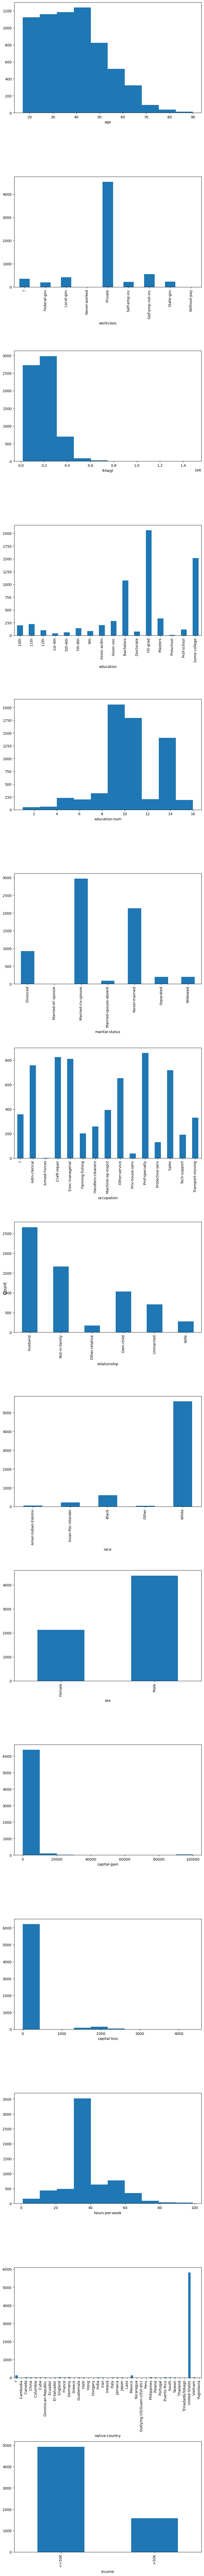

In [78]:
# Plotting function for discrete variables

import math

def discrete_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(8,100))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        if df.dtypes[columns[i]] != 'int64':
            df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax)
        else:
            df[columns[i]].hist(ax=ax, grid=False) 
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()

discrete_plots(test,column_names,1)

Text(0, 0.5, 'Count')

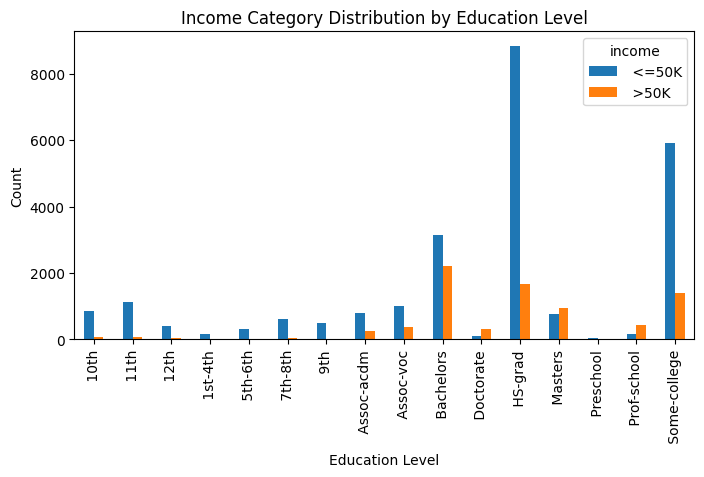

In [79]:
# Group the data by education level and income category
education_income_counts = df.groupby(['education', 'income']).size().unstack()

# Grouped bar plot
education_income_counts.plot(kind='bar', stacked=False, figsize=(8, 4))

# Add labels and title
plt.title('Income Category Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

In [70]:
# income counts
income_counts = df['income'].value_counts()

# sorting income count by descending order
income_counts_sorted = income_counts.sort_values(ascending=False)

# display the sorted income levels and their counts
print(income_counts_sorted)

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64


In [71]:
# education counts
education_counts = df['education'].value_counts()

# sorting education count by descending order
education_counts_sorted = education_counts.sort_values(ascending=False)

# display the sorted education levels and their counts
print(education_counts_sorted)

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64


In [80]:
# hours-per-week counts
hours_counts = df['hours-per-week'].value_counts()

# sorting hours-per-week count by descending order
hours_counts_sorted = hours_counts.sort_values(ascending=False)

# display the sorted hours-per-week levels and their counts
print(hours_counts_sorted)

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64


In [84]:
mean_hours = np.mean(df['hours-per-week'])
std_hours = np.std(df['hours-per-week'])

print("Mean hours-per-week = %.2f" % mean_hours)
print("Standard Deviation hours-per-week = %.2f" % std_hours)

Mean hours-per-week = 40.44
Standard Deviation hours-per-week = 12.35


In [93]:
# Create a contingency table

#contingency_table = pd.crosstab(data['education'], data['income'])

# Perform chi-square test of independence
#chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

#print("Chi-square statistic:", chi2)
#print("P-value:", p)

Chi-square statistic: 4429.653302288619
P-value: 0.0
